In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv('heart.csv')


In [139]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Problem definition: Prediction of heart disease

Feature engineering -- Remove null or empty values from the dataset. Convert categorical values to numerical values.

In [140]:
# Replace empty strings with NaN so they can be handled by dropna
df.replace('', np.nan, inplace=True)
#  drops rows with any NaN values
df = df.dropna()

Set prediction target--Row Heart disease

In [141]:
target= df['HeartDisease']
print(target.head()) # firts 5 rows
print(target.describe())

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64
count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64


Set input variables that will be trained to predict if a patient has heart disease or not

Attribute Information

Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [142]:
inputs = df.drop('HeartDisease', axis=1)
inputs.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


Many columns have non numeric data, so we need to convert them to numeric for the model to work properly .. So Feature engineering is needed

In [143]:
# Male==0 Female ==1
inputs.loc[inputs["Sex"]=="M", "Sex"] = 0
inputs.loc[inputs["Sex"]=="F", "Sex"] = 1
print(inputs.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
0   40   0           ATA        140          289          0     Normal    172  \
1   49   1           NAP        160          180          0     Normal    156   
2   37   0           ATA        130          283          0         ST     98   
3   48   1           ASY        138          214          0     Normal    108   
4   54   0           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  
0              N      0.0       Up  
1              N      1.0     Flat  
2              N      0.0       Up  
3              Y      1.5     Flat  
4              N      0.0       Up  


In [144]:
inputs["ChestPainType"].unique() # Check unique values


array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

We will change accordingly: Typical angina==0, Atypical angina==1, Non-anginal pain==2, Asymptomatic==3
TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic

In [145]:
inputs.loc[inputs["ChestPainType"]=="TA", "ChestPainType"] = 0
inputs.loc[inputs["ChestPainType"]=="ATA", "ChestPainType"] = 1
inputs.loc[inputs["ChestPainType"]=="NAP", "ChestPainType"] = 2
inputs.loc[inputs["ChestPainType"]=="ASY", "ChestPainType"] = 3
inputs["ChestPainType"].head()
inputs["ChestPainType"].unique()

array([1, 2, 3, 0], dtype=object)

In [146]:
inputs["RestingECG"].unique()


array(['Normal', 'ST', 'LVH'], dtype=object)

We will change accordingly: Normal==0, having ST-T wave abnormality==1, showing probable or definite left ventricular hypertrophy==2
Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable

In [147]:
inputs.loc[inputs["RestingECG"]=="Normal","RestingECG"]=0
inputs.loc[inputs["RestingECG"]=="ST","RestingECG"]=1
inputs.loc[inputs["RestingECG"]=="LVH","RestingECG"]=2
inputs["RestingECG"].head()
inputs["RestingECG"].unique()


array([0, 1, 2], dtype=object)

In [148]:
inputs["ExerciseAngina"].unique() 

array(['N', 'Y'], dtype=object)

We will change accordingly: exercise-induced angina [Y: Yes==1, N: No==0]

In [149]:
inputs.loc[inputs["ExerciseAngina"]=="N","ExerciseAngina"]=0
inputs.loc[inputs["ExerciseAngina"]=="Y","ExerciseAngina"]=1
inputs["ExerciseAngina"].head()
inputs["ExerciseAngina"].unique()

array([0, 1], dtype=object)

In [150]:
inputs["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

As previously mentioned, we will change accordingly: [Up: upsloping=2, Flat: flat=1, Down: downsloping=0]

In [151]:
inputs.loc[inputs["ST_Slope"]=="Up","ST_Slope"]=2
inputs.loc[inputs["ST_Slope"]=="Flat","ST_Slope"]=1
inputs.loc[inputs["ST_Slope"]=="Down","ST_Slope"]=0
inputs["ST_Slope"].head()
inputs["ST_Slope"].unique()

array([2, 1, 0], dtype=object)

In [152]:
non_numeric_cols = inputs.select_dtypes(include=['object']).columns

if not non_numeric_cols.empty:
    print("The DataFrame contains non-numeric columns: ", non_numeric_cols)
else:
    print("The DataFrame doesn't contain any non-numeric columns.")


The DataFrame contains non-numeric columns:  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


To ensure Compatibility all non numeric data will be converted to numeric. Some are identified as strings or objects

In [153]:
inputs["Sex"] = pd.to_numeric(inputs["Sex"])
inputs["ChestPainType"] = pd.to_numeric(inputs["ChestPainType"])
inputs["RestingECG"] = pd.to_numeric(inputs["RestingECG"])
inputs["ExerciseAngina"] = pd.to_numeric(inputs["ExerciseAngina"])
inputs["ST_Slope"] = pd.to_numeric(inputs["ST_Slope"])

inputs.head() # first 5 rows
print(inputs.shape[1]) # number of columns

inputs.describe() # summary statistics


11


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,2.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.361656
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000
50%,54.000000,0.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000


We will load the necessary libraries and run a simple perceptron and diagnostic to see how model fits the data

In [160]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


In [155]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)


In [156]:
#Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
# Initialize the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-3)
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [159]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.842391304347826
Precision: 0.90625
Recall: 0.8130841121495327
F1 Score: 0.8571428571428572


In [161]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[68  9]
 [20 87]]


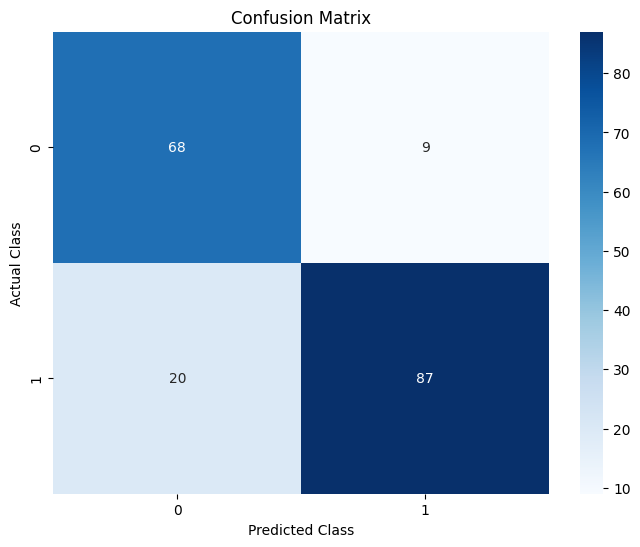

In [162]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()